##  XClove Time Series Data Visualized

XClove has several sensors available for testing in September 10-17. It will give the sensor data of:

Temperature (C)
Humidity (%)
Moisture (%)
Weight (gram)

### 1. Load the csv from directory

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
clovescsv = pd.read_csv("D:\Kuliah\XLFL\IoT\Data Feed In/feed 10-17 sept clean.csv")
clovescsv

,created_at,entry_id,temperature,humidity,moisture,field4
0,2020-09-10 23:30:56 WIB,3761,27.2,90.6,105,2206.42
1,2020-09-10 23:31:12 WIB,3762,NAN,NAN,93,2306.42
2,2020-09-10 23:31:28 WIB,3763,27.1,91.1,119,2347.95
3,2020-09-10 23:31:45 WIB,3764,27,90.7,108,2452.00
4,2020-09-10 23:32:01 WIB,3765,27,90.8,115,2279.26
...,...,...,...,...,...,...
27268,2020-09-17 10:30:59 WIB,31029,45,42,28,119.95
27269,2020-09-17 10:31:15 WIB,31030,44.9,42.8,22,130.21
27270,2020-09-17 10:31:31 WIB,31031,NAN,NAN,45,123.26
27271,2020-09-17 10:31:47 WIB,31032,45,43.8,45,131.95


or basically just use ibm_db that I uploaded (error)

###### Data Information

Data types

In [2]:
clovescsv.dtypes

created_at      object
entry_id         int64
temperature     object
humidity        object
moisture         int64
field4         float64
dtype: object

Data counts

In [3]:
clovescsv.count()

created_at     27273
entry_id       27273
temperature    27273
humidity       27273
moisture       27273
field4         27273
dtype: int64

###### Replace NaN value of Data
I wanna replace the NAN value with average from above 5 and below 5 of data

In [4]:
clovescsv[clovescsv.humidity==" NAN"]

,created_at,entry_id,temperature,humidity,moisture,field4
1,2020-09-10 23:31:12 WIB,3762,NAN,NAN,93,2306.42
9,2020-09-10 23:33:23 WIB,3770,NAN,NAN,111,2246.42
17,2020-09-10 23:35:33 WIB,3778,NAN,NAN,128,2150.68
22,2020-09-10 23:36:54 WIB,3783,NAN,NAN,130,2134.11
23,2020-09-10 23:37:10 WIB,3784,NAN,NAN,130,2132.32
...,...,...,...,...,...,...
27255,2020-09-17 10:27:27 WIB,31016,NAN,NAN,43,136.95
27258,2020-09-17 10:28:16 WIB,31019,NAN,NAN,38,139.58
27260,2020-09-17 10:28:49 WIB,31021,NAN,NAN,40,130.53
27265,2020-09-17 10:30:10 WIB,31026,NAN,NAN,40,125.37


In [5]:
cleandf = clovescsv.copy()
cleandf

,created_at,entry_id,temperature,humidity,moisture,field4
0,2020-09-10 23:30:56 WIB,3761,27.2,90.6,105,2206.42
1,2020-09-10 23:31:12 WIB,3762,NAN,NAN,93,2306.42
2,2020-09-10 23:31:28 WIB,3763,27.1,91.1,119,2347.95
3,2020-09-10 23:31:45 WIB,3764,27,90.7,108,2452.00
4,2020-09-10 23:32:01 WIB,3765,27,90.8,115,2279.26
...,...,...,...,...,...,...
27268,2020-09-17 10:30:59 WIB,31029,45,42,28,119.95
27269,2020-09-17 10:31:15 WIB,31030,44.9,42.8,22,130.21
27270,2020-09-17 10:31:31 WIB,31031,NAN,NAN,45,123.26
27271,2020-09-17 10:31:47 WIB,31032,45,43.8,45,131.95


In [6]:
# Make it 0 first, so it's easier to replace i guess
i = 0
while(i != clovescsv.temperature.count()):
    if(cleandf.temperature[i] == " NAN"):
        cleandf.loc[i, 'temperature'] = cleandf.loc[i-1,'temperature']
        cleandf.loc[i, 'humidity'] = cleandf.loc[i-1, 'humidity']
    i=i+1
cleandf

#Note that doing this also replace the clovescsv (WHY?)

,created_at,entry_id,temperature,humidity,moisture,field4
0,2020-09-10 23:30:56 WIB,3761,27.2,90.6,105,2206.42
1,2020-09-10 23:31:12 WIB,3762,27.2,90.6,93,2306.42
2,2020-09-10 23:31:28 WIB,3763,27.1,91.1,119,2347.95
3,2020-09-10 23:31:45 WIB,3764,27,90.7,108,2452.00
4,2020-09-10 23:32:01 WIB,3765,27,90.8,115,2279.26
...,...,...,...,...,...,...
27268,2020-09-17 10:30:59 WIB,31029,45,42,28,119.95
27269,2020-09-17 10:31:15 WIB,31030,44.9,42.8,22,130.21
27270,2020-09-17 10:31:31 WIB,31031,44.9,42.8,45,123.26
27271,2020-09-17 10:31:47 WIB,31032,45,43.8,45,131.95


To be safe, lets change the data type

In [7]:
cleandf.temperature = pd.to_numeric(cleandf.temperature)
cleandf.humidity =  pd.to_numeric(cleandf.humidity)

In [8]:
i = 0
while (i != clovescsv.temperature.count()):
    cleandf.loc[i, 'created_at'] = cleandf.created_at[i].replace(" WIB","")
    i=i+1

In [9]:
cleandf['created_at'] = pd.to_datetime(cleandf['created_at'], format='%Y-%m-%d %H:%M:%S')
#cleandf.set_index("created_at", inplace=False)

In [10]:
cleandf.dtypes

created_at     datetime64[ns]
entry_id                int64
temperature           float64
humidity              float64
moisture                int64
field4                float64
dtype: object

Summarize the Dataset

In [11]:
cleandf.describe()

,entry_id,temperature,humidity,moisture,field4
count,27273.000000,27273.000000,27273.000000,27273.000000,27273.000000
mean,17397.000000,30.376534,78.757724,86.263264,788.861263
std,7873.181282,7.078458,20.882374,28.322684,811.835109
min,3761.000000,21.800000,34.200000,11.000000,0.000000
25%,10579.000000,25.000000,58.000000,66.000000,0.000000
50%,17397.000000,27.200000,88.700000,88.000000,266.950000
75%,24215.000000,35.500000,94.300000,105.000000,1583.630000
max,31033.000000,47.800000,99.900000,164.000000,12947.210000


### 2. Plot the graph
Use matplot to plot the initial graph

In [12]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn
seaborn.set()

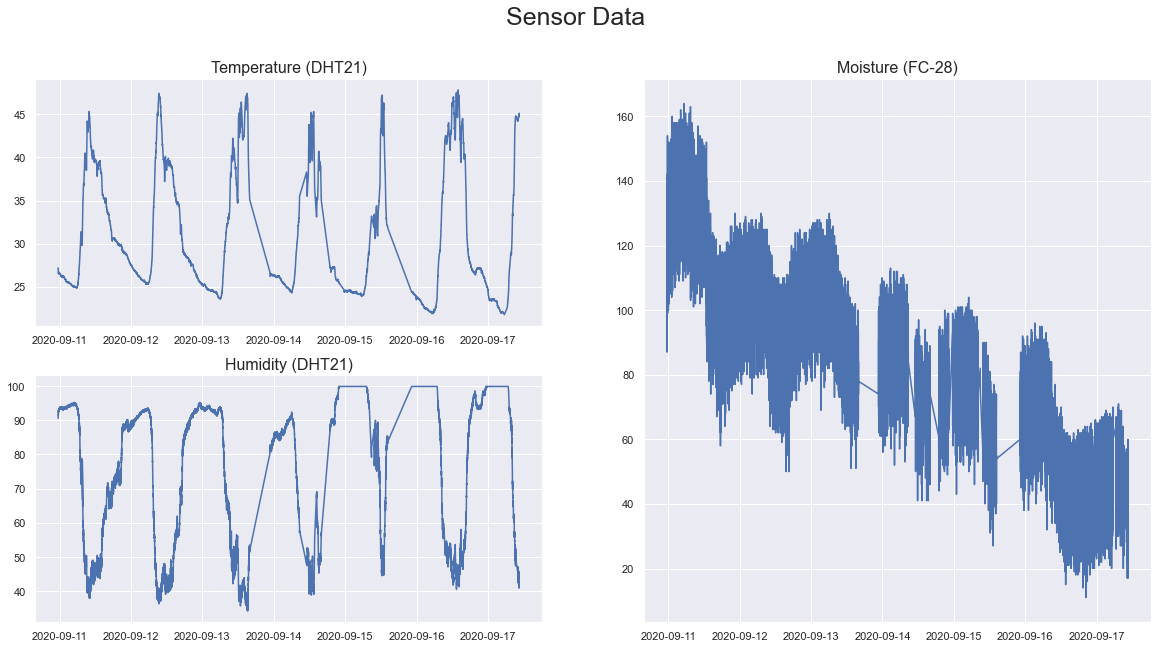

In [13]:
fig = plt.figure(figsize=(20, 10))
gs = plt.GridSpec(nrows=2, ncols=2, figure=fig)

ax0 = fig.add_subplot(gs[0, 0])
ax0.plot(cleandf.created_at, cleandf.temperature )
ax0.set_title("Temperature (DHT21)", fontsize = 16)

ax1 = fig.add_subplot(gs[1, 0])
ax1.plot(cleandf.created_at, cleandf.humidity)
ax1.set_title("Humidity (DHT21)", fontsize = 16)

ax2 = fig.add_subplot(gs[:, 1])
ax2.plot(cleandf.created_at, cleandf.moisture)
ax2.set_title("Moisture (FC-28)", fontsize = 16)

fig.suptitle("Sensor Data", fontsize = 25)
plt.show()

### 3. Plotting moving average
Since our moisture data is full of noise, we need to smoothen the curve so we can look at the trend properly

In [14]:
moistReal = pd.DataFrame(cleandf.moisture)
moistEMA = pd.DataFrame(cleandf.moisture.ewm(alpha=0.01,adjust = False).mean())
moistSMA = pd.DataFrame(cleandf.moisture.rolling(300,min_periods=1).mean())

moist=pd.concat([cleandf.created_at,moistReal,moistEMA,moistSMA],axis=1)
moist.columns=['created_at','real','EMA','SMA']
moist

,created_at,real,EMA,SMA
0,2020-09-10 23:30:56,105,105.000000,105.000000
1,2020-09-10 23:31:12,93,104.880000,99.000000
2,2020-09-10 23:31:28,119,105.021200,105.666667
3,2020-09-10 23:31:45,108,105.050988,106.250000
4,2020-09-10 23:32:01,115,105.150478,108.000000
...,...,...,...,...
27268,2020-09-17 10:30:59,28,40.123028,42.193333
27269,2020-09-17 10:31:15,22,39.941798,42.126667
27270,2020-09-17 10:31:31,45,39.992380,42.170000
27271,2020-09-17 10:31:47,45,40.042456,42.183333


##### Compare each moving average method

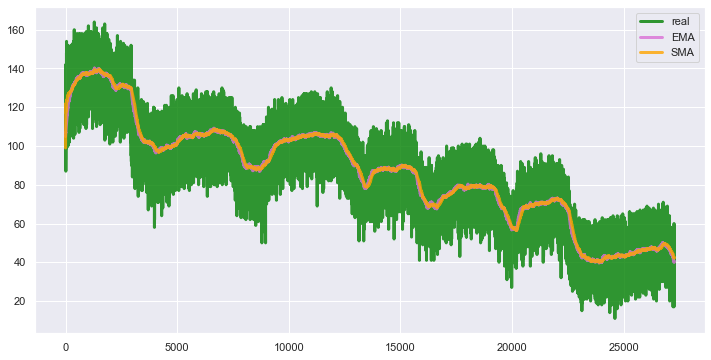

In [15]:
moist[['real', 'EMA', 'SMA']].plot(color=['green','orchid','orange'], linewidth=3, figsize=(12,6), alpha=0.8)

Both EMA and SMA are quite accurate given the right parameters.
Let's do the same method for temperature & humidity

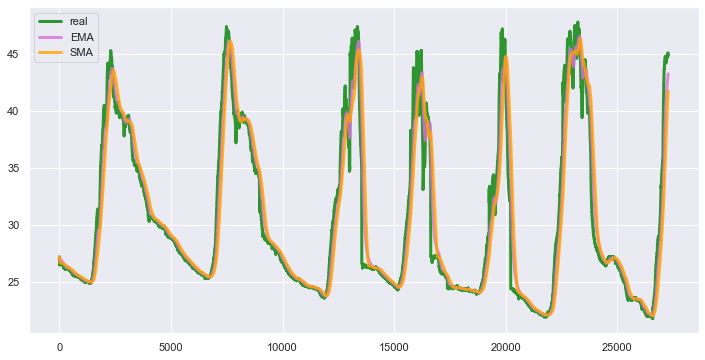

In [16]:
tempReal = pd.DataFrame(cleandf.temperature)
tempEMA = pd.DataFrame(cleandf.temperature.ewm(alpha=0.01,adjust = False).mean())
tempSMA = pd.DataFrame(cleandf.temperature.rolling(300,min_periods=1).mean())

temp=pd.concat([cleandf.created_at,tempReal,tempEMA,tempSMA],axis=1)
temp.columns=['created_at','real','EMA','SMA']

temp[['real', 'EMA', 'SMA']].plot(color=['green','orchid','orange'], linewidth=3, figsize=(12,6), alpha=0.8)

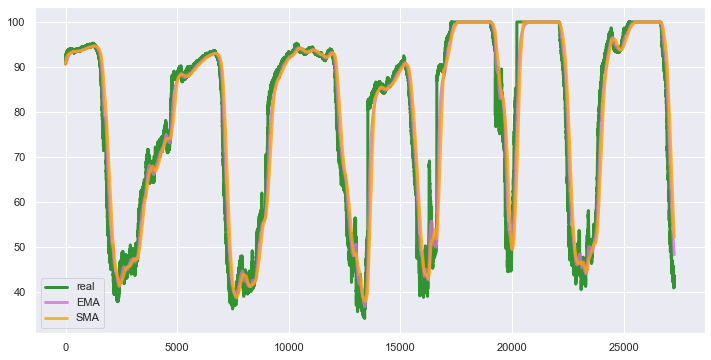

In [17]:
humdReal = pd.DataFrame(cleandf.humidity)
humdEMA = pd.DataFrame(cleandf.humidity.ewm(alpha=0.01,adjust = False).mean())
humdSMA = pd.DataFrame(cleandf.humidity.rolling(300,min_periods=1).mean())

humd=pd.concat([humdReal,humdEMA,humdSMA],axis=1)
humd.columns=['real','EMA','SMA']

humd[['real', 'EMA', 'SMA']].plot(color=['green','orchid','orange'], linewidth=3, figsize=(12,6), alpha=0.8)

Create entirely new dataframe for smoothen charts

In [18]:
smoothdf=pd.concat([cleandf.created_at,moistEMA,tempEMA,humdEMA],axis=1)
smoothdf

,created_at,moisture,temperature,humidity
0,2020-09-10 23:30:56,105.000000,27.200000,90.600000
1,2020-09-10 23:31:12,104.880000,27.200000,90.600000
2,2020-09-10 23:31:28,105.021200,27.199000,90.605000
3,2020-09-10 23:31:45,105.050988,27.197010,90.605950
4,2020-09-10 23:32:01,105.150478,27.195040,90.607890
...,...,...,...,...
27268,2020-09-17 10:30:59,40.123028,43.183424,48.531595
27269,2020-09-17 10:31:15,39.941798,43.200589,48.474279
27270,2020-09-17 10:31:31,39.992380,43.217583,48.417536
27271,2020-09-17 10:31:47,40.042456,43.235408,48.371360


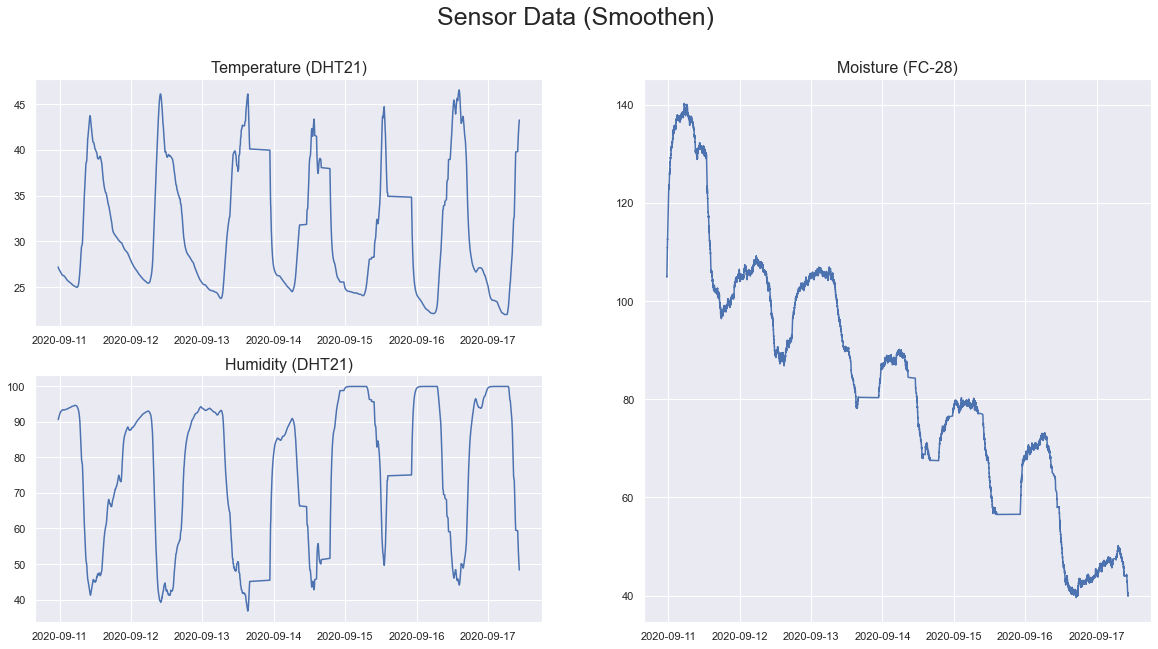

In [19]:
fig = plt.figure(figsize=(20, 10))
gs = plt.GridSpec(nrows=2, ncols=2, figure=fig)

ax0 = fig.add_subplot(gs[0, 0])
ax0.plot(smoothdf.created_at, smoothdf.temperature )
ax0.set_title("Temperature (DHT21)", fontsize = 16)

ax1 = fig.add_subplot(gs[1, 0])
ax1.plot(smoothdf.created_at, smoothdf.humidity)
ax1.set_title("Humidity (DHT21)", fontsize = 16)

ax2 = fig.add_subplot(gs[:, 1])
ax2.plot(smoothdf.created_at, smoothdf.moisture)
ax2.set_title("Moisture (FC-28)", fontsize = 16)

fig.suptitle("Sensor Data (Smoothen)", fontsize = 25)
plt.show()

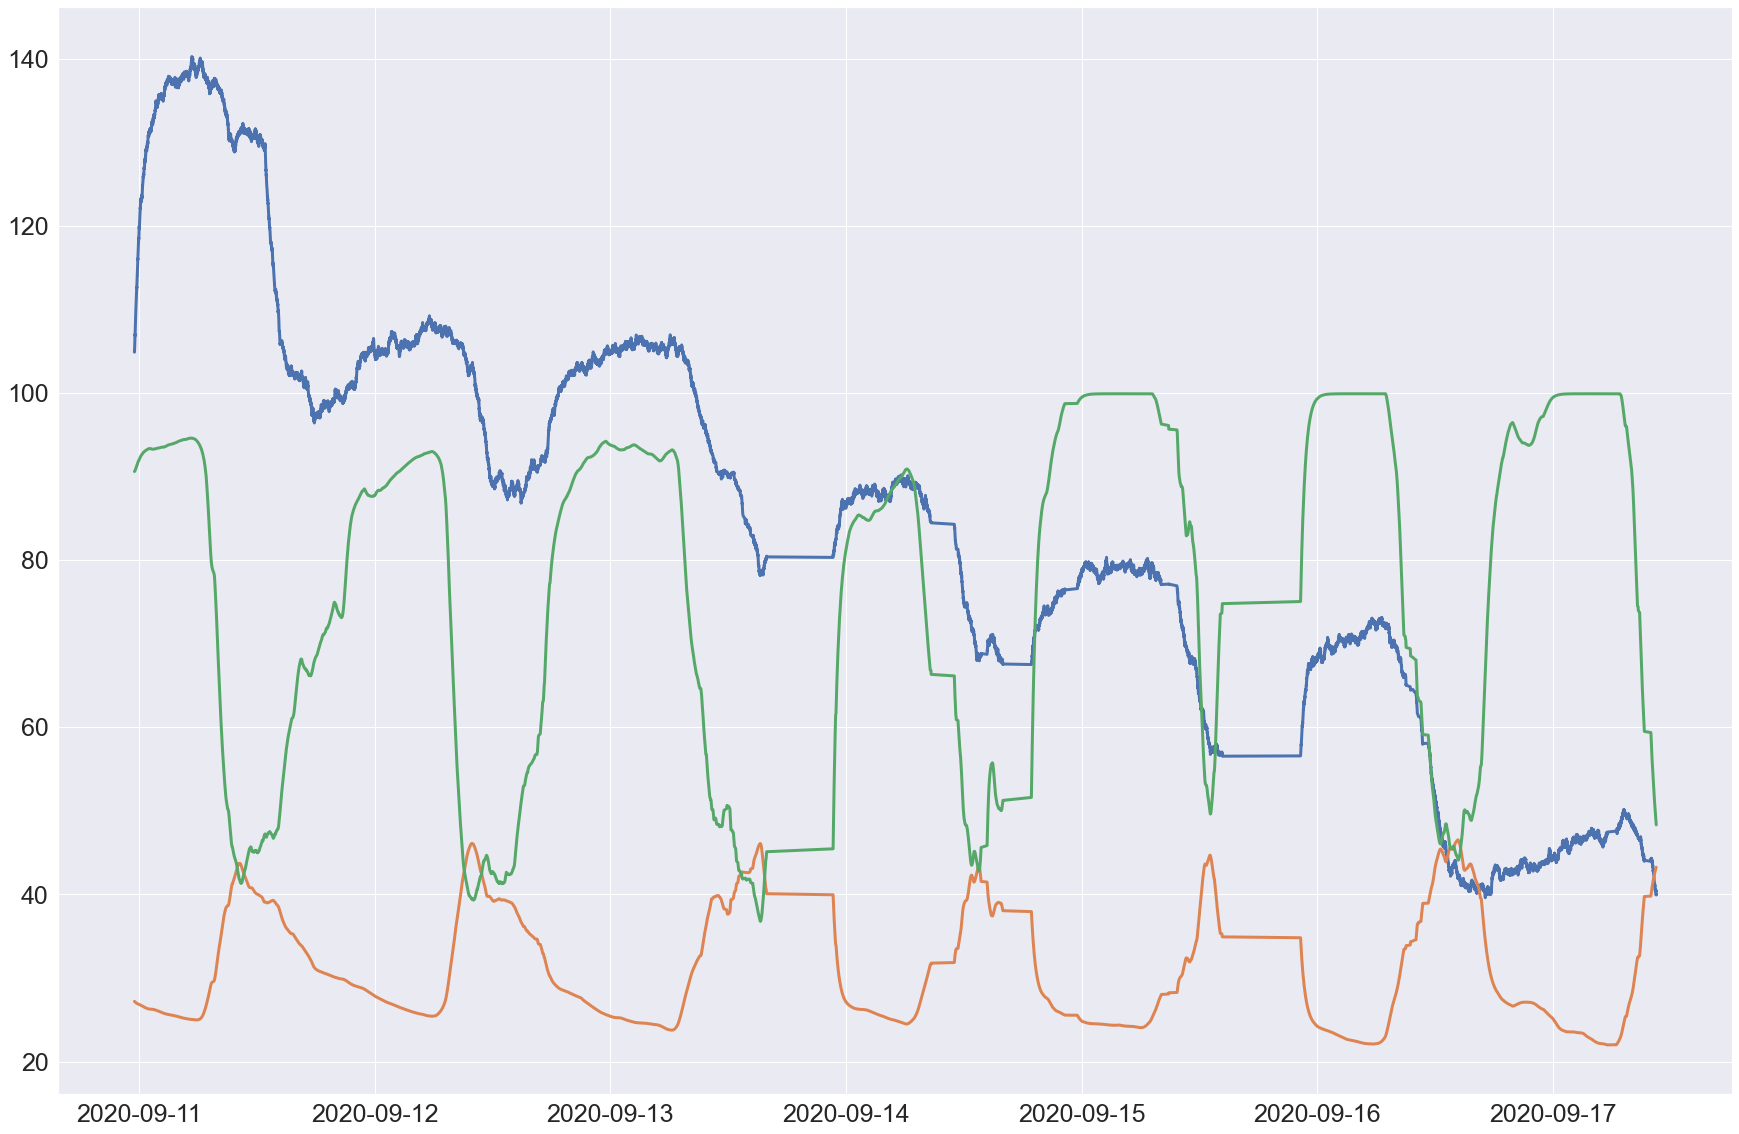

In [20]:
#smoothdf[['moisture', 'temperature', 'humidity']].plot(color=['blue','red','orange'], linewidth=3, figsize=(10,6), alpha=0.8)
plt.figure(figsize=(30,20))
plt.plot(smoothdf.created_at,smoothdf[['moisture', 'temperature', 'humidity']], linewidth=3)
plt.xticks(fontsize = 25)
plt.yticks(fontsize = 25)
plt.show()

### 4. Analyze the data
We need to split the data by one-day basis to look more detial on how each parameters correlate

In [21]:
daybasis=pd.concat([pd.DataFrame(moist.created_at[(moist['created_at'] > '2020-09-12 00:00:00') & (moist['created_at'] < '2020-09-13 23:59:59')]), \
                    moistSMA[(moist['created_at'] > '2020-09-12 00:00:00') & (moist['created_at'] < '2020-09-13 23:59:59')],\
                    tempSMA[(moist['created_at'] > '2020-09-12 00:00:00') & (moist['created_at'] < '2020-09-13 23:59:59')],\
                    humdSMA[(moist['created_at'] > '2020-09-12 00:00:00') & (moist['created_at'] < '2020-09-13 23:59:59')]],\
                    axis=1)

daybasis.dtypes

created_at     datetime64[ns]
moisture              float64
temperature           float64
humidity              float64
dtype: object

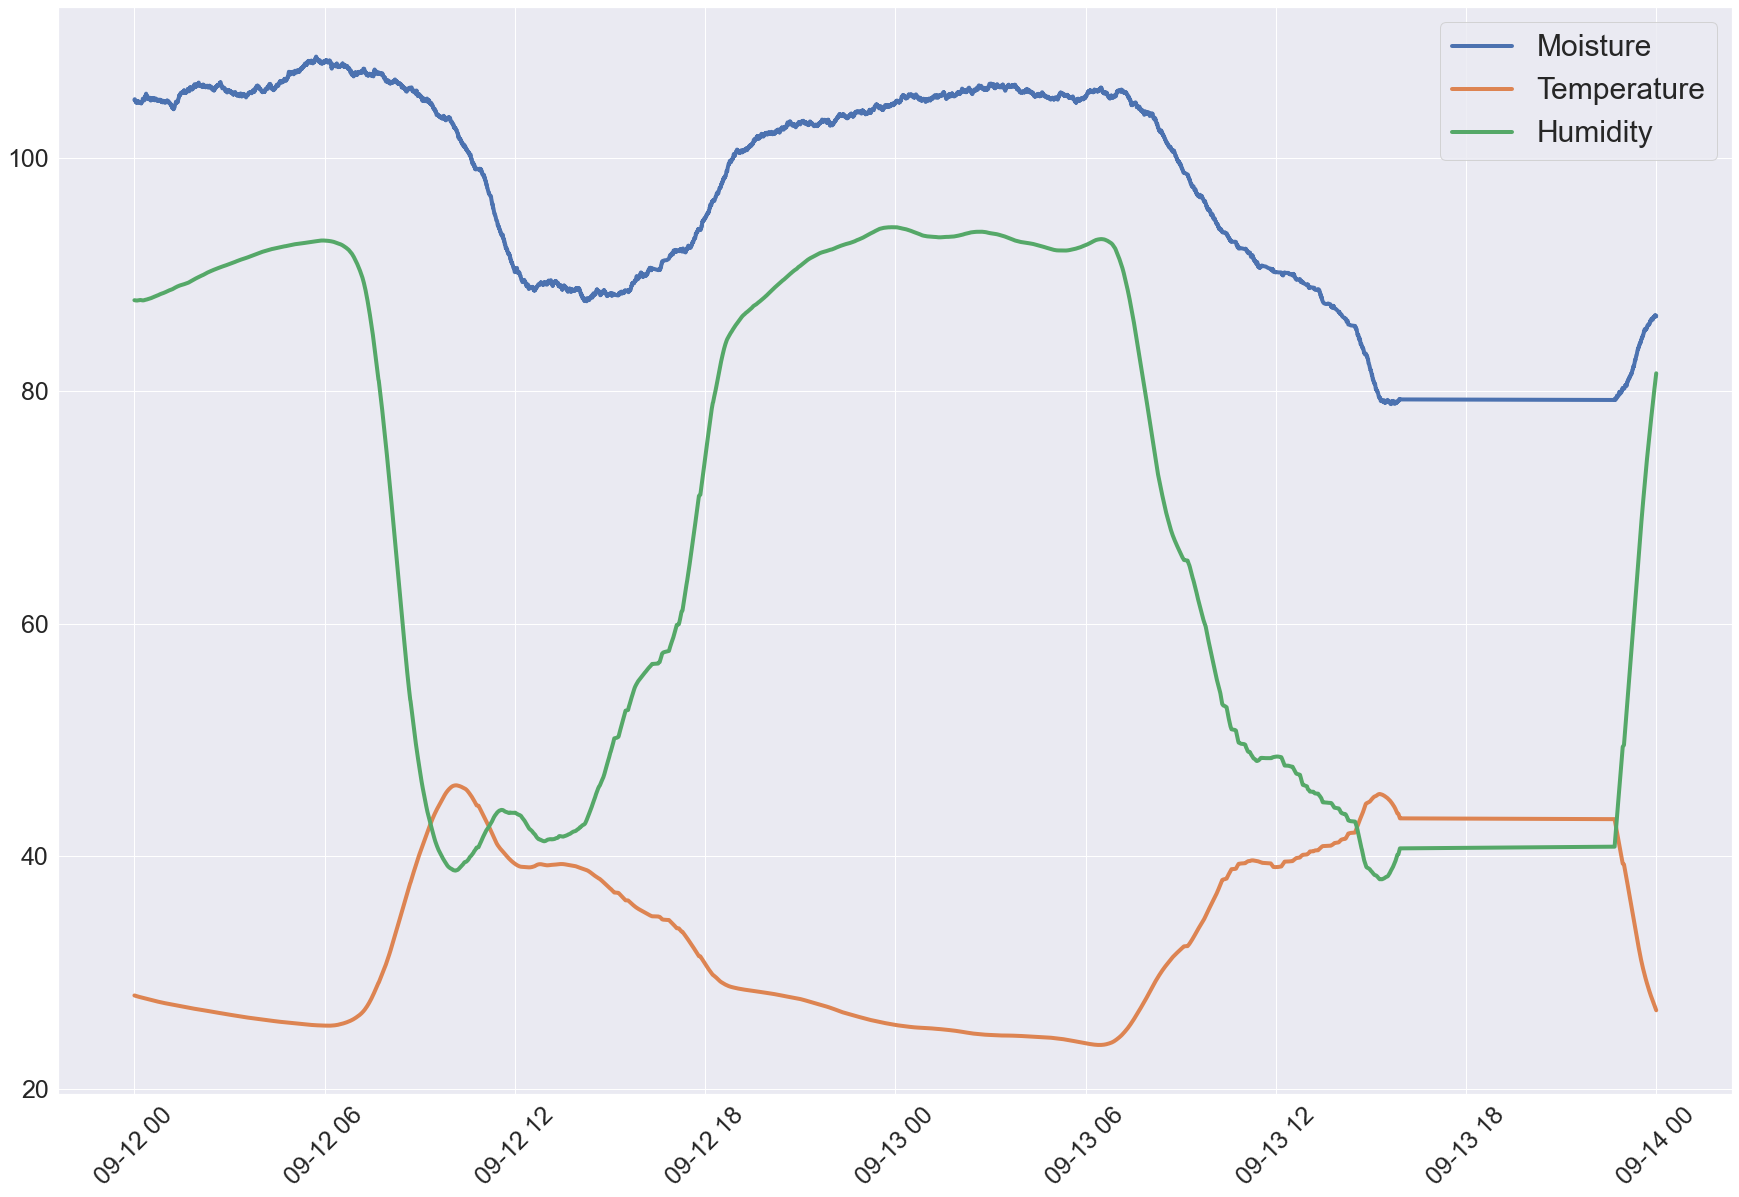

In [22]:
x = daybasis['created_at']
y = daybasis[['moisture','temperature','humidity']]

plt.figure(figsize=(30,20))
plt.xticks(fontsize = 25, rotation = 45)
plt.yticks(fontsize = 25)
plt.plot(x, y, linewidth = 4)
plt.legend(['Moisture','Temperature','Humidity'],prop = {'size': 30})
plt.show()


from the data we can see that there's an increase in moisture around 15:00 to 08:00

#### Explolatory Analysis with Time Series Decomposition
Based on this link https://thecleverprogrammer.com/2020/07/01/time-series-analysis-and-forecasting-with-python/

In [23]:
from pylab import rcParams
import statsmodels.api as sm

In [38]:
#lets create new dataframe. Just to be clear - tsdf = time series dataframe (with time indexing)
#tsdf = cleandf.copy()
tsdf = smoothdf.copy()
tsdf = tsdf.set_index('created_at')
tsdf.index

DatetimeIndex(['2020-09-10 23:30:56', '2020-09-10 23:31:12',
               '2020-09-10 23:31:28', '2020-09-10 23:31:45',
               '2020-09-10 23:32:01', '2020-09-10 23:32:17',
               '2020-09-10 23:32:34', '2020-09-10 23:32:50',
               '2020-09-10 23:33:06', '2020-09-10 23:33:23',
               ...
               '2020-09-17 10:29:38', '2020-09-17 10:29:54',
               '2020-09-17 10:30:10', '2020-09-17 10:30:26',
               '2020-09-17 10:30:42', '2020-09-17 10:30:59',
               '2020-09-17 10:31:15', '2020-09-17 10:31:31',
               '2020-09-17 10:31:47', '2020-09-17 10:32:03'],
              dtype='datetime64[ns]', name='created_at', length=27273, freq=None)

In [39]:
# y as the moisture label 
y = tsdf['moisture'].resample('33s').mean()
y = pd.DataFrame(y)

In [40]:
# we need to look for missing values first
y.isna().sum()

moisture    3385
dtype: int64

In [41]:
#replace the missing value
#y.loc[y['moisture'].isna() == True] = y['moisture'].mean()
#y.iloc[10,0] == 'NaN'
#y.loc[y['moisture'].isna() == True].iloc[0] 
#y = y.fillna(0)
i = 0
while (i != len(y)):
    if(pd.isna(y['moisture'][i])):
        #need a better way to replace NAN value. Using nearby observation (i to i+5) gave an error with returning NaN
        y['moisture'][i] = y['moisture'][i-1]
    i=i+1

In [42]:
y[pd.isna(y['moisture']) == True] #if there's nothing to return, then you're doing good.

,moisture
created_at,


In [43]:
decomposition = sm.tsa.seasonal_decompose(y, model='additive', freq=(round((24*60)/(33/60))))

<ipython-input-43-fcc267777ad1>:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  decomposition = sm.tsa.seasonal_decompose(y, model='additive', freq=(round((24*60)/(33/60))))


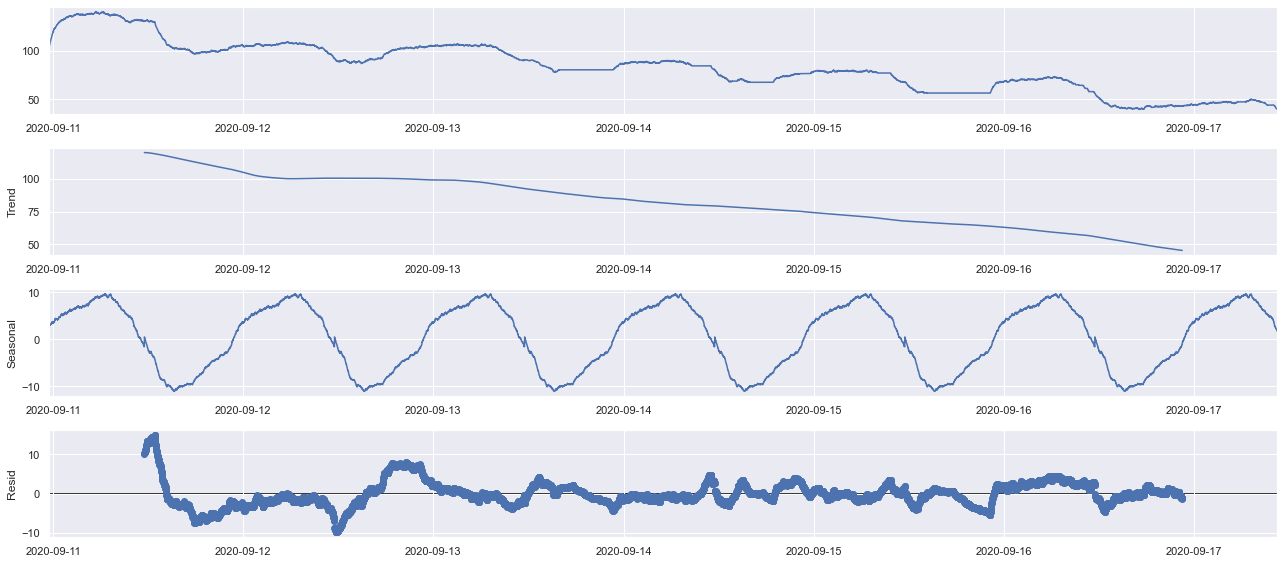

In [44]:
rcParams['figure.figsize'] = 18, 8
fig = decomposition.plot()
plt.show()